## 14. Validation

**Where to use training vs testing data 1**

In [1]:
# just a helper function for easier youtube call
def strip_url(url):
    return url.replace('https://youtu.be/','')

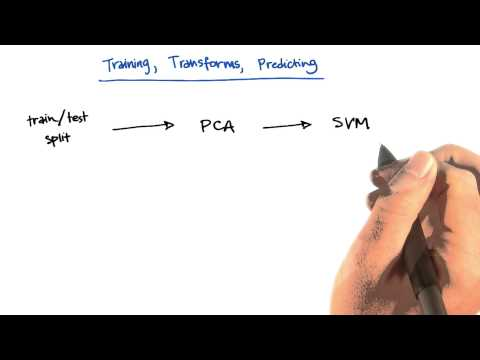

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo(strip_url('https://youtu.be/NvgWKf-iBsw'))

We feed training data to PCA fit, not all or test data. The model we create should be trained on training data, and then predict which we then could compared to test data. So test data should not be fed to PCA at all. PCA should only get training data.

**Where to use training vs. testing data 2**

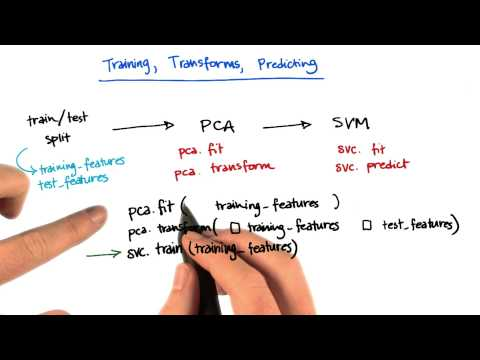

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo(strip_url('https://youtu.be/K4gGK4ScT7M'))

Again, PCA should transform only training data. It gives us new input features from given input features so it should be from training data. For same reason as above, we should not include test data here as well. 

**Where to use training vs. testing data 3**

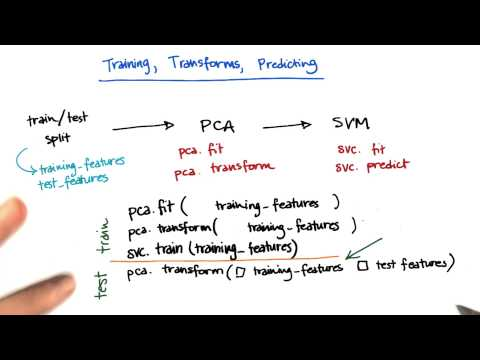

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo(strip_url('https://youtu.be/-XfG5hXveiE'))

In testing phase, we are just **transforming** test data to create new input features, from the PCA model (obtained via **fit** method called earlier with training data). This distinction is very important. We are not refitting. Our PCA object now already has model "fitted" with training data. Now I could feed PCA with any input data, and with that model, it could provide respective new feature set. And we need to feed that to SVM because, earlier we trained SVM with compatable training feature set from PCA. 

**Where to use training vs. testing data 4**

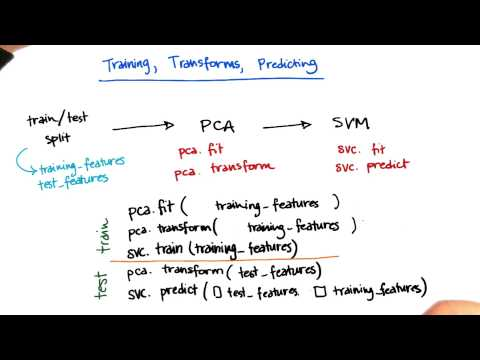

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo(strip_url('https://youtu.be/3RuKO3PQWg0'))

**GridSearchCV in sklearn**
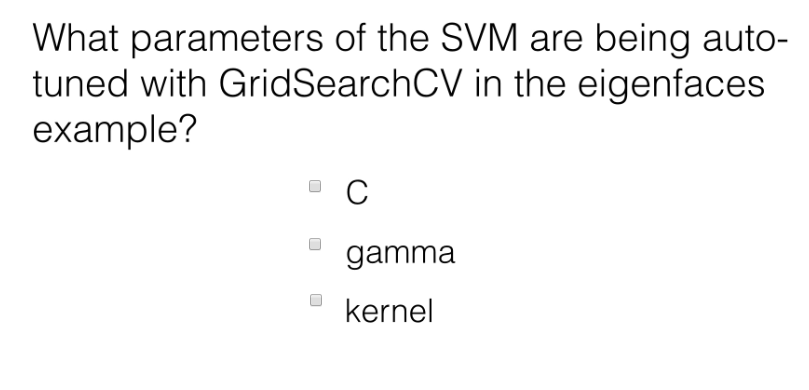

Reference: [Eigenfaces example](http://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html)

Ans: C and Gamma. Note only one kernel used in given example, so there is no tuning w.r.t kernel.

## Validation Mini-Project

Udacity: In this mini-project, you’ll start from scratch in making a training-testing split in the data. This will be the first step toward your final project, of building a POI identifier.

In [6]:
#!/usr/bin/python

"""
    Starter code for the validation mini-project.
    The first step toward building your POI identifier!

    Start by loading/formatting the data

    After that, it's not our code anymore--it's yours!
"""

import pickle
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

data_dict = pickle.load(open("../17. Final Project/final_project_dataset.pkl", "r") )

### first element is our labels, any added elements are predictor
### features. Keep this the same for the mini-project, but you'll
### have a different feature list when you do the final project.
features_list = ["poi", "salary"]  # poi is the label , salary is feature/input

data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)


### it's all yours from here forward!  

**Your First (Overfit) POI Identifier**

<u>Udacity</u>: Create a decision tree classifier (just use the default parameters), train it on **all the data** (you will fix this in the next part!), and print out the accuracy. THIS IS AN OVERFIT TREE, DO NOT TRUST THIS NUMBER! Nonetheless, what’s the accuracy?

In [7]:
from sklearn import tree
from sklearn.metrics import accuracy_score

def classify(features_train, labels_train):

    ### your code goes here--should return a trained decision tree classifer
    X = features_train
    Y = labels_train
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X,Y)
    return clf

# train
clf = classify(features, labels)  # we are mindlessly feeing all data for training 'Decision tree'


# ask classifier to predict
labels_pred = clf.predict(features)  # and we are mindlessly asking it to predict any of the all data

acc = accuracy_score(labels, labels_pred)
acc

0.9894736842105263

**Deploying a Training/Testing Regime**

<u>Udacity</u>: Now you’ll add in training and testing, so that you get a trustworthy accuracy number. Use the train_test_split validation available in sklearn.cross_validation; hold out 30% of the data for testing and set the random_state parameter to 42 (random_state controls which points go into the training set and which are used for testing; setting it to 42 means we know exactly which events are in which set, and can check the results you get). What’s your updated accuracy?

In [8]:
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.3, random_state=42)

# train
clf = classify(features_train, labels_train)  # now we make sensible choice..

# ask classifier to predict
labels_pred = clf.predict(features_test)  # and we are mindlessly asking it to predict any of the all data

acc = accuracy_score(labels_test, labels_pred)
acc

C:\Users\parthi2929\Anaconda3\envs\py2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.7241379310344828